# CSCI 1470/2470 Final Project, Fall 2022
## Bitao Jin, James Ro, Christopher Tripp

In [1]:
import os
import sys
import h5py  # To interface with the HDF5 binary data format.
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

### Data Preprocessing and Exploration

In [2]:
# Local path to the data.
data_path = "../data/Galaxy10_DECals.h5"

# Get the images and labels from file.
with h5py.File(data_path, 'r') as F:
    images = np.array(F['images'])
    labels = np.array(F['ans'])

In [3]:
# Get the class numbers and the number of examples for each class.
class_ids, class_counts = np.unique(labels, return_counts=True)

class_names = [
    "Disturbed Galaxies",
    "Merging Galaxies",
    "Round Smooth Galaxies",
    "In-between Round Smooth Galaxies",
    "Cigar Shaped Smooth Galaxies",
    "Barred Spiral Galaxies",
    "Unbarred Tight Spiral Galaxies",
    "Unbarred Loose Spiral Galaxies",
    "Edge-on Galaxie without Bulge",
    "Edge-on Galaxies with Bulge"]

In [4]:
# Convert the labels to categorical 10 classes.
#labels = tf.keras.utils.to_categorical(labels, 10)

# Convert the data to floats.
labels = labels.astype(np.float32)
images = images.astype(np.float32)

In [5]:
print(f"Images shape is {images.shape}")
print(f"Labels shape is {labels.shape}")

Images shape is (17736, 256, 256, 3)
Labels shape is (17736,)


Images are 256 x 256 RGB files.

In [6]:
# Print some information about the data set.
print(f"TOTAL NUMBER OF EXAMPLES: {images.shape[0]}")
for class_id, class_count in enumerate(class_counts):
    print(f"Class {class_id} ({class_names[class_id]}) " \
          f"has {class_count} examples.")

TOTAL NUMBER OF EXAMPLES: 17736
Class 0 (Disturbed Galaxies) has 1081 examples.
Class 1 (Merging Galaxies) has 1853 examples.
Class 2 (Round Smooth Galaxies) has 2645 examples.
Class 3 (In-between Round Smooth Galaxies) has 2027 examples.
Class 4 (Cigar Shaped Smooth Galaxies) has 334 examples.
Class 5 (Barred Spiral Galaxies) has 2043 examples.
Class 6 (Unbarred Tight Spiral Galaxies) has 1829 examples.
Class 7 (Unbarred Loose Spiral Galaxies) has 2628 examples.
Class 8 (Edge-on Galaxie without Bulge) has 1423 examples.
Class 9 (Edge-on Galaxies with Bulge) has 1873 examples.


Next let's display one image from each class, just to make sure the data looks ok.

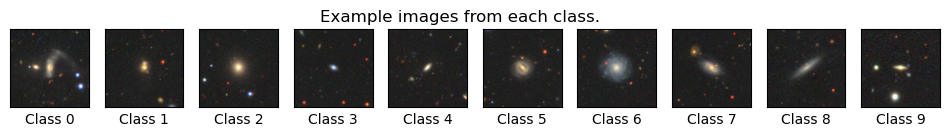

In [7]:
# Get indices of first image for each class.
first_img_indices = []
for i in range(0, 10):
    this_class_starting_index = np.where(labels == i)[0][0]
    first_img_indices.append(this_class_starting_index)

# Plot the corresponding images.
fig, ax = plt.subplots(1, 10)
fig.set_size_inches(12, 1.2)
for i, each_image in enumerate(first_img_indices):
    ax[i].imshow(images[each_image].astype('uint8'))
    ax[i].tick_params(left=False)
    ax[i].tick_params(bottom=False)
    ax[i].tick_params(labelleft=False)
    ax[i].tick_params(labelbottom=False)
    ax[i].set_xlabel(f"Class {i}")
fig.suptitle("Example images from each class.")
plt.show()

## Creating the CNN Model

In [8]:
%load_ext autoreload
%autoreload 2
import galaxy_project

Started splitting the data.
Finished splitting the data.
Starting model training.
Epoch 1/10
125/125 [==============================] - 14s 102ms/step - loss: 2.3896 - categorical_accuracy: 0.3064 - val_loss: 2.4015 - val_categorical_accuracy: 0.2830
Epoch 2/10
125/125 [==============================] - 12s 97ms/step - loss: 1.7185 - categorical_accuracy: 0.4079 - val_loss: 1.5879 - val_categorical_accuracy: 0.4356
Epoch 3/10
125/125 [==============================] - 12s 99ms/step - loss: 1.6185 - categorical_accuracy: 0.4466 - val_loss: 1.5053 - val_categorical_accuracy: 0.4761
Epoch 4/10
125/125 [==============================] - 12s 99ms/step - loss: 1.5363 - categorical_accuracy: 0.4631 - val_loss: 1.4778 - val_categorical_accuracy: 0.4953
Epoch 5/10
125/125 [==============================] - 13s 102ms/step - loss: 1.4514 - categorical_accuracy: 0.4966 - val_loss: 1.5637 - val_categorical_accuracy: 0.4705
Epoch 6/10
125/125 [==============================] - 13s 103ms/step - loss:

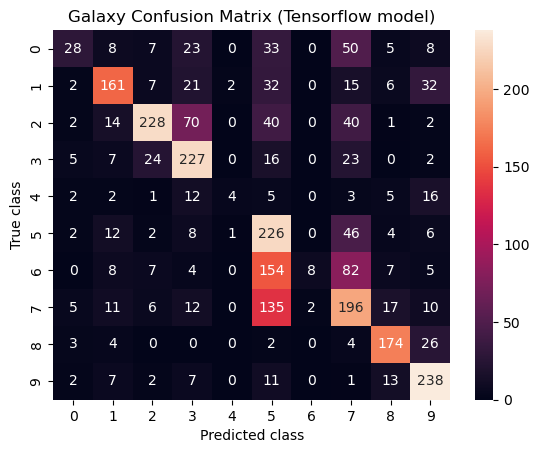

In [10]:
galaxy_project.run_cnn_model(images, labels)